## Preâmbulo


In [267]:
import numpy as np
import pandas as pd
import exp_physics as ep
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as scp

sns.set_style('darkgrid')

In [268]:
# Dados da luz azul variando intensidade

A20 = pd.read_csv('dados/A20.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
A40 = pd.read_csv('dados/A40.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
A60 = pd.read_csv('dados/A60.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
A80 = pd.read_csv('dados/A80.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
A100 = pd.read_csv('dados/A100.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})

Amarelo = pd.read_csv('dados/Amarelo.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Verde = pd.read_csv('dados/Verde.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Ultra = pd.read_csv('dados/Ultra.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Violeta = pd.read_csv('dados/Violeta.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Azul = pd.read_csv('dados/Azul.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Preto = pd.read_csv('dados/Preto.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})
Fundo = pd.read_csv('dados/Fundo.csv', delimiter=';', decimal=',').rename(columns={'Tensao [V]': 'V', "Corrente [A]":'i'})

In [269]:
l_Intensidade = [A20, A40, A60, A80, A100]

l_Cores = [Preto, Fundo, Amarelo, Verde, Azul, Violeta, Ultra]

In [270]:
def calc_sigma_i(i):
    if i < 10*10e-9:
        return i*(0.3/100) + 400 * 10e-14
    if i < 100*10e-9:
        return i*(0.2/100) + 1 * 10e-12
    else:
        return i*(0.15/100) + 10 * 10e-12

def calc_sigma_V(V):
    return V*(0.1/100) + 1 * 10e-3

In [271]:
for df in l_Intensidade:
    df['si'] = df['i'].apply(calc_sigma_i)
    df['sV'] = df['V'].apply(calc_sigma_V)

for df in l_Cores:
    df['si'] = df['i'].apply(calc_sigma_i)
    df['sV'] = df['V'].apply(calc_sigma_V)

In [272]:
l_Cores = [Amarelo, Verde, Azul, Violeta, Ultra]

nomes = ['Amarelo', 'Verde', 'Azul', 'Violeta', 'Ultravioleta']

paleta = ['gold', 'seagreen', 'royalblue', 'darkorchid', 'indigo']

In [273]:
def propaga_si(si1,si2):
    return np.sqrt(si1**2 + si2**2)

## Correção da corrente

Para corrigir a corrente, primeiro vamos remover o ruído da corrente de fundo sem o pano, subtraindo a corrente de fundo da corrente. Em seguida, vamos propagar as incertezas.

$$i^\prime = i - i_{fundo}$$

Podemos propagar por meio de:

$$\sigma_{i^\prime} = \sqrt{\sigma_i^2 + \sigma_{i_{fundo}}^2} $$

In [274]:
for df in l_Intensidade:
    df['i'] = df['i'] - Fundo['i']
    df['si'] = propaga_si(df['si'], Fundo['si'])

for df in l_Cores:
    df['i'] = df['i'] - Fundo['i']
    df['si'] = propaga_si(df['si'], Fundo['si'])

Agora vamos encontrar o valor da corrente do ânodo e subtrair, da mesma forma:

$$i_c = i^\prime - i_a$$
Faremos uma aproximação usando a região onde $i_c<0$, que deveria ser $i_c = 0$. Então, assumimos que:

$$i^\prime = i_c + i_a$$

$$\therefore i^\prime = i_a \text{, na região onde } i^\prime < 0$$
Vamos analisar as funções nesse intervalo:

Text(0.5, 1.0, 'Corrente por tensão quando $i<0$')

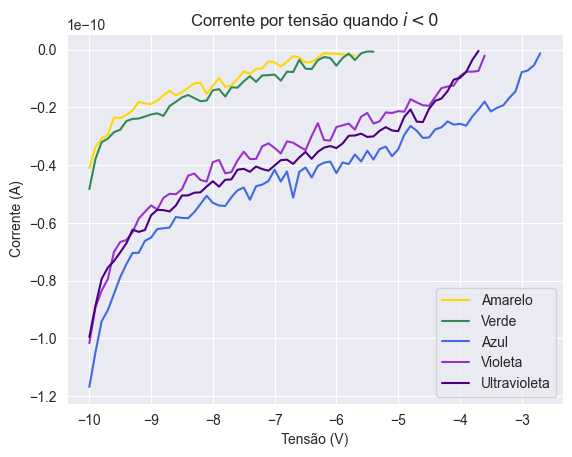

In [275]:
for i, cor in enumerate(l_Cores):
    sns.lineplot(x=cor['V'], y=cor[cor['i']<0]['i'], color=paleta[i], label=nomes[i])

plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title(r'Corrente por tensão quando $i<0$')

Como o intervalo é pequeno, podemos fazer uma aproximação linear:

$$i(V) = A\cdot V + B$$

Ou, podemos considerar o formato da curva e usar uma função exponencial, tirando logaritmo para torná-la linear:

$$i_a(V) = -B\cdot e^{-A\cdot V}$$

$$|i_a(V)| = B\cdot e^{-A\cdot V}$$

$$\log(|i_a|) = \log(B) - A\cdot V$$

Vamos testar os dois métodos.

In [276]:
lfunc = lambda x, A, B: A*x + B

logfunc = lambda x, A, B: B - A*x

In [277]:
fit_linear = []
cov_linear = []

fit_log = []
cov_log = []

for cor in l_Cores:
    fit1, cov1 = scp.curve_fit(lfunc, cor[cor['i']<0]['V'], cor[cor['i']<0]['i'], sigma=cor[cor['i']<0]['si']**2, absolute_sigma=True)
    fit2, cov2 = scp.curve_fit(logfunc, cor[cor['i']<0]['V'], np.log(abs(cor[cor['i']<0]['i'])), sigma=cor[cor['i']<0]['si']**2, absolute_sigma=True)

    fit_linear.append(fit1)
    cov_linear.append(cov1)

    fit_log.append(fit2)
    cov_log.append(cov2)

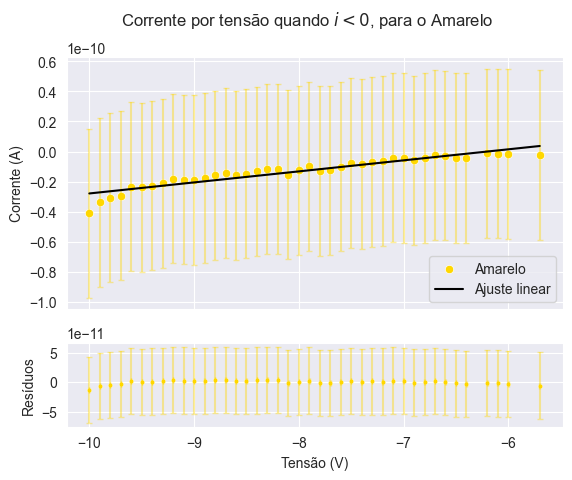

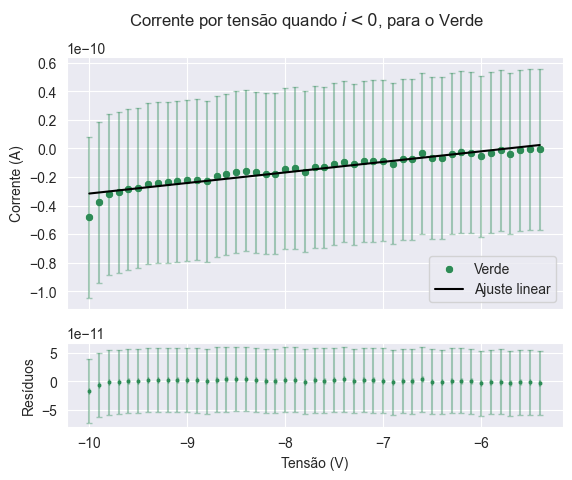

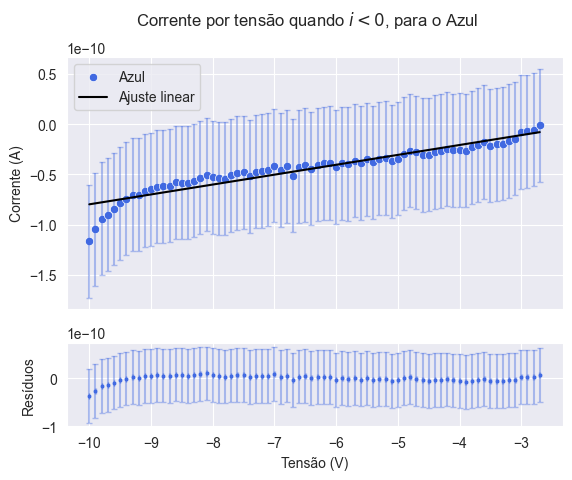

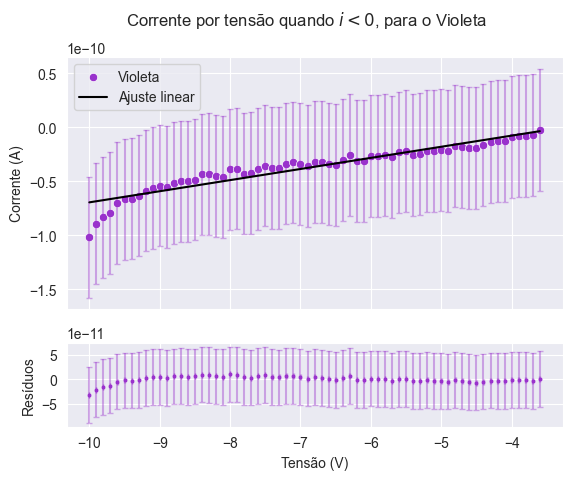

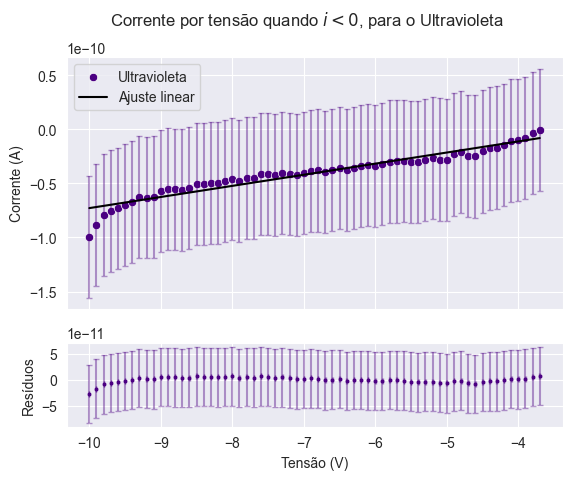

In [278]:
for df, fit, cor, nome in zip(l_Cores, fit_linear, paleta, nomes):

   fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

   x = df[df['i']<0]['V']
   y = df[df['i']<0]['i']
   x_sigma = df[df['i']<0]['sV']
   y_sigma = df[df['i']<0]['si']

   alpha = 0.4
   
   # Gráfico dos dados
    
   sns.scatterplot(x=x,
                    y=y,
                    color=cor,
                    label=nome,
                    ax=ax1)
   
   # Resíduos
   
   y_res = y - lfunc(x, *fit)
   sns.scatterplot(x=x, y=y_res, ax=ax2,color=cor, s=10)

   # Incertezas

   ax1.errorbar(x, y, xerr=x_sigma, yerr=y_sigma, fmt=' ', capsize=2,c=cor, alpha=alpha)
   ax2.errorbar(x, y_res, xerr=x_sigma, yerr=y_sigma, fmt=' ', capsize=2,c=cor, alpha=alpha)

   # Ajuste linear

   sns.lineplot(x= x, 
                y= lfunc(x, *fit),
                color='black',
                label = 'Ajuste linear',
                ax=ax1)

   # Nomes de eixos e título
   
   plt.xlabel('Tensão (V)')
   ax1.set_ylabel('Corrente (A)')
   ax2.set_ylabel('Resíduos')
   plt.suptitle(f'Corrente por tensão quando $i<0$, para o {nome}')


   plt.savefig(f'plots/ajustes_linear/{nome}_linear.png')

   plt.show()

Agora, vamos subtrair os valores de $i_a$ de $i^\prime$ e propagar as incertezas.

Text(0.5, 1.0, 'Corrente por tensão quando $i<0$')

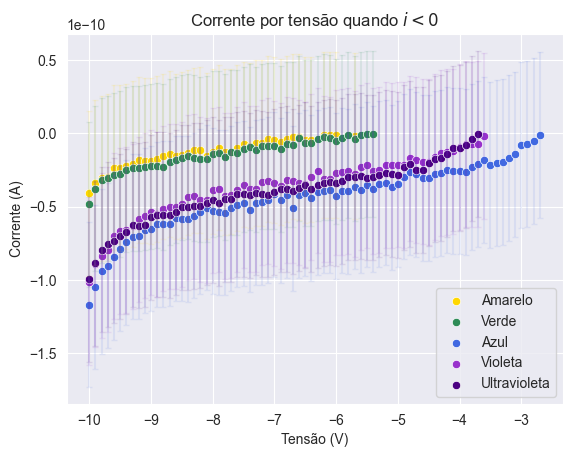

In [279]:
for df, cor, nome in zip(l_Cores, paleta, nomes):

    x = df[df['i']<0]['V']
    y = df[df['i']<0]['i']

    x_sigma = df[df['i']<0]['sV']
    y_sigma = df[df['i']<0]['si']

    alpha = 0.1

    sns.scatterplot(x=x, y=y, color=cor, label=nome)

    plt.errorbar(x, y, xerr=x_sigma, yerr=y_sigma, fmt=' ', capsize=2,c=cor, alpha=alpha)
    

plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title(r'Corrente por tensão quando $i<0$')

In [280]:
for cor, fit in zip(l_Cores, fit_linear):
    cor.loc[cor['i']<0, 'i'] = cor[cor['i']<0]['i'] - lfunc(cor[cor['i']<0]['V'], *fit)

Text(0.5, 1.0, 'Corrente por tensão quando $i<0$, após a correção')

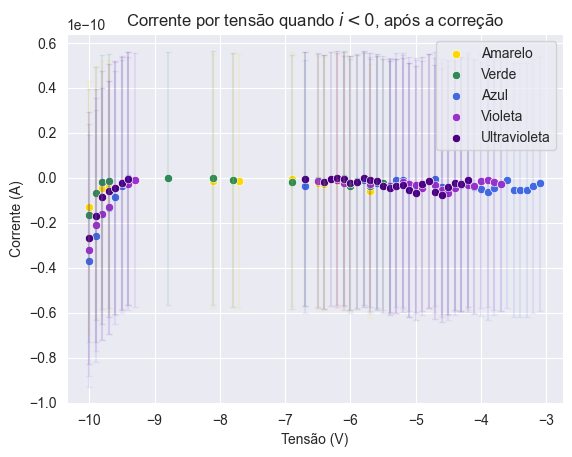

In [282]:
for df, cor, nome in zip(l_Cores, paleta, nomes):

    x = df[df['i']<0]['V']
    y = df[df['i']<0]['i']

    x_sigma = df[df['i']<0]['sV']
    y_sigma = df[df['i']<0]['si']

    alpha = 0.1

    sns.scatterplot(x=x, y=y, color=cor, label=nome)

    plt.errorbar(x, y, xerr=x_sigma, yerr=y_sigma, fmt=' ', capsize=2,c=cor, alpha=alpha)
    

plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title(r'Corrente por tensão quando $i<0$, após a correção')

In [286]:
for df, nome in zip(l_Cores,nomes):
    df.to_csv(f'dados/corrigidos/linear/{nome}_corrigido_linear.csv')

## Gráficos

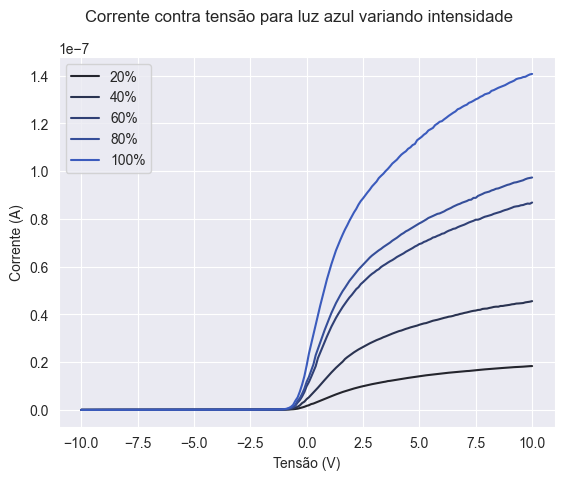

In [283]:
sns.set_palette(sns.dark_palette('royalblue'))
sns.lineplot(x=A20['V'], y=A20['i'],label = '20%')
sns.lineplot(x=A40['V'], y=A40['i'], label = '40%' )
sns.lineplot(x=A60['V'], y=A60['i'], label = '60%')
sns.lineplot(x=A80['V'], y=A80['i'], label = '80%')
sns.lineplot(x=A100['V'], y=A100['i'], label = '100%')

plt.legend()

plt.xlabel("Tensão (V)")
plt.ylabel('Corrente (A)')

plt.suptitle('Corrente contra tensão para luz azul variando intensidade')


plt.savefig('plots/azul_intensidade.png')
plt.show()



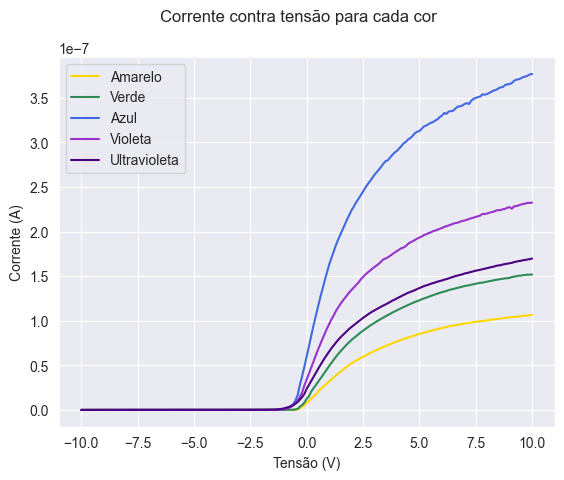

In [284]:
sns.lineplot(x=Amarelo['V'], y=Amarelo['i'],label = 'Amarelo', c='gold')
sns.lineplot(x=Verde['V'], y=Verde['i'], label = 'Verde', c='seagreen')
sns.lineplot(x=Azul['V'], y=Azul['i'], label = 'Azul', c='royalblue')
sns.lineplot(x=Violeta['V'], y=Violeta['i'], label = 'Violeta', c='darkorchid')
sns.lineplot(x=Ultra['V'], y=Ultra['i'], label = 'Ultravioleta', c='indigo')

plt.legend()

plt.xlabel("Tensão (V)")
plt.ylabel('Corrente (A)')

plt.suptitle('Corrente contra tensão para cada cor')


plt.savefig('plots/cores.png')
plt.show()

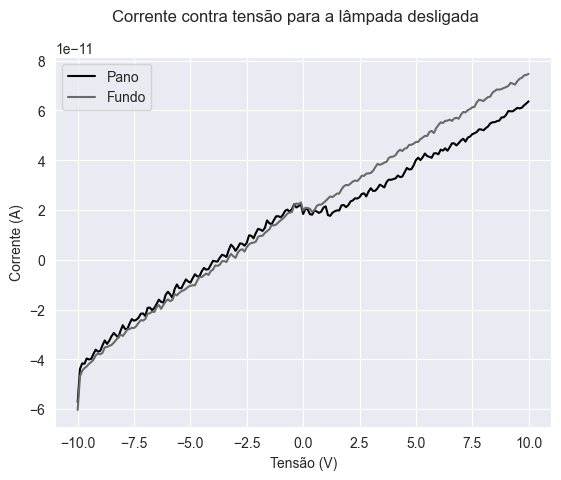

In [113]:
sns.lineplot(x=Preto['V'], y=Preto['i'], label = 'Pano', c ='black')
sns.lineplot(x=Fundo['V'], y=Fundo['i'], label = 'Fundo', c = 'dimgray')

plt.legend()

plt.xlabel("Tensão (V)")
plt.ylabel('Corrente (A)')

plt.suptitle('Corrente contra tensão para a lâmpada desligada')


plt.savefig('plots/fundo.png')


plt.show()

# ARRUMAR DEPOIS

In [ ]:
for df, fit, cor, nome in zip(l_Cores, fit_log, paleta, nomes):

   fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

   x = df[df['i']<0]['V']
   y = df[df['i']<0]['i']
   x_sigma = df[df['i']<0]['sV']
   y_sigma = df[df['i']<0]['si']

   # Ajuste linear (logarítmico)

   sns.lineplot(x= x, 
                y= logfunc(x, fit[0], fit[1]),
                color='black',
                label = 'Ajuste linear',
                ax=ax1)
    
   # Gráfico dos dados (logarítmico)

   sns.scatterplot(x=x,
                    y=np.log(abs(y)),
                    color=cor,
                    label=nome,
                    ax=ax1)
   
      # Resíduos
   
   y_res = np.log(abs(y)) - logfunc(x, *fit)
   sns.scatterplot(x=x, y=y_res, ax=ax2,color=cor, s=10)

   # Incertezas

   #ax1.errorbar(x, y, xerr=x_sigma, yerr=np.log(y_sigma), fmt=' ', capsize=2,c=cor, alpha=0.2)
   #ax2.errorbar(x, y, xerr=x_sigma, yerr=y_sigma, fmt=' ', capsize=2,c=cor, alpha=0.2)

   # Nomes de eixos e título
   
   plt.xlabel('Tensão (V)')
   ax1.set_ylabel(r'log($|Corrente|$) (log(A))')
   ax2.set_ylabel('Resíduos')
   plt.suptitle(f'Logaritmo do módulo da corrente por tensão quando $i<0$, para o{nome}')


   plt.savefig(f'plots/ajustes_log/{nome}_log.png')

   plt.show()